<a href="https://www.kaggle.com/code/lalit7881/toyota-stock-data-1980-2026?scriptVersionId=300740032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/omarshahrukh/toyota-stock-prices-1980-2026-historical-data/Toyota_Stock_Prices_1980_2026.csv


In [2]:
import matplotlib.pyplot as plt

## Import dataset

In [3]:
df = pd.read_csv("/kaggle/input/datasets/omarshahrukh/toyota-stock-prices-1980-2026-historical-data/Toyota_Stock_Prices_1980_2026.csv")

In [4]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1980-03-18,1.8207,1.8501,1.8207,1.8207,9343
1,1980-03-19,1.8207,1.8207,1.8207,1.8207,0
2,1980-03-20,1.8207,1.8501,1.8207,1.8207,10277
3,1980-03-21,1.8649,1.8944,1.8649,1.8649,8409
4,1980-03-24,1.8723,1.9017,1.8723,1.8723,2803


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11508 non-null  object 
 1   Close   11508 non-null  float64
 2   High    11508 non-null  float64
 3   Low     11508 non-null  float64
 4   Open    11508 non-null  float64
 5   Volume  11508 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 539.6+ KB


In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,11508.000000,11508.000000,11508.000000,11508.000000,1.150800e+04
mean,56.436218,56.761133,56.110388,56.444586,2.192929e+05
std,51.051420,51.318871,50.747118,51.047030,3.851212e+05
min,1.783800,1.783800,1.783800,1.783800,0.000000e+00
25%,15.771775,15.879500,15.771775,15.816300,1.425875e+04
50%,41.571500,41.877000,41.185550,41.563900,1.051880e+05
75%,85.989425,86.359250,85.546600,86.017375,3.029250e+05
max,243.764100,245.745900,242.787700,245.262500,1.858270e+07


In [7]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [10]:
df.shape

(11508, 6)

In [11]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [12]:
df.nunique()

Date      11508
Close      7891
High       7850
Low        7880
Open       7727
Volume     5880
dtype: int64

In [13]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with invalid dates
df = df.dropna(subset=['Date'])

# Sort by Date
df = df.sort_values(by='Date')

# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing numeric values using forward fill
df[['Open', 'High', 'Low', 'Close', 'Volume']] = \
df[['Open', 'High', 'Low', 'Close', 'Volume']].fillna(method='ffill')

# Reset index
df = df.reset_index(drop=True)

print("Cleaned Dataset Shape:", df.shape)

Cleaned Dataset Shape: (11508, 6)


In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11508 non-null  datetime64[ns]
 1   Close   11508 non-null  float64       
 2   High    11508 non-null  float64       
 3   Low     11508 non-null  float64       
 4   Open    11508 non-null  float64       
 5   Volume  11508 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 539.6 KB
None
                                Date         Close          High  \
count                          11508  11508.000000  11508.000000   
mean   2003-03-17 23:49:29.343065728     56.436218     56.761133   
min              1980-03-18 00:00:00      1.783800      1.783800   
25%              1991-10-16 18:00:00     15.771775     15.879500   
50%              2003-03-19 12:00:00     41.571500     41.877000   
75%              2014-08-21 06:00:00     85.989425     8

## Data visualizations

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

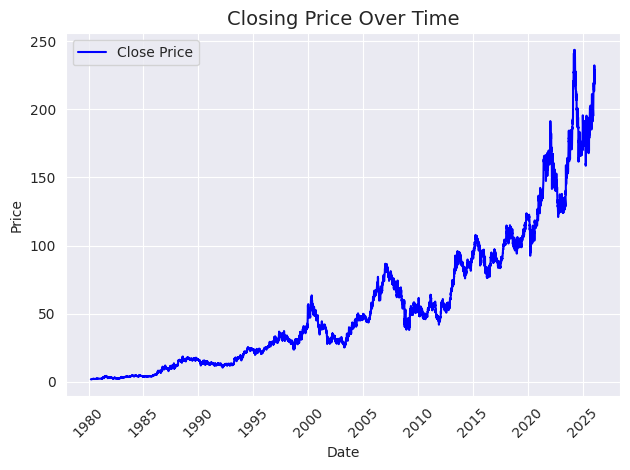

In [16]:
plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
plt.title("Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

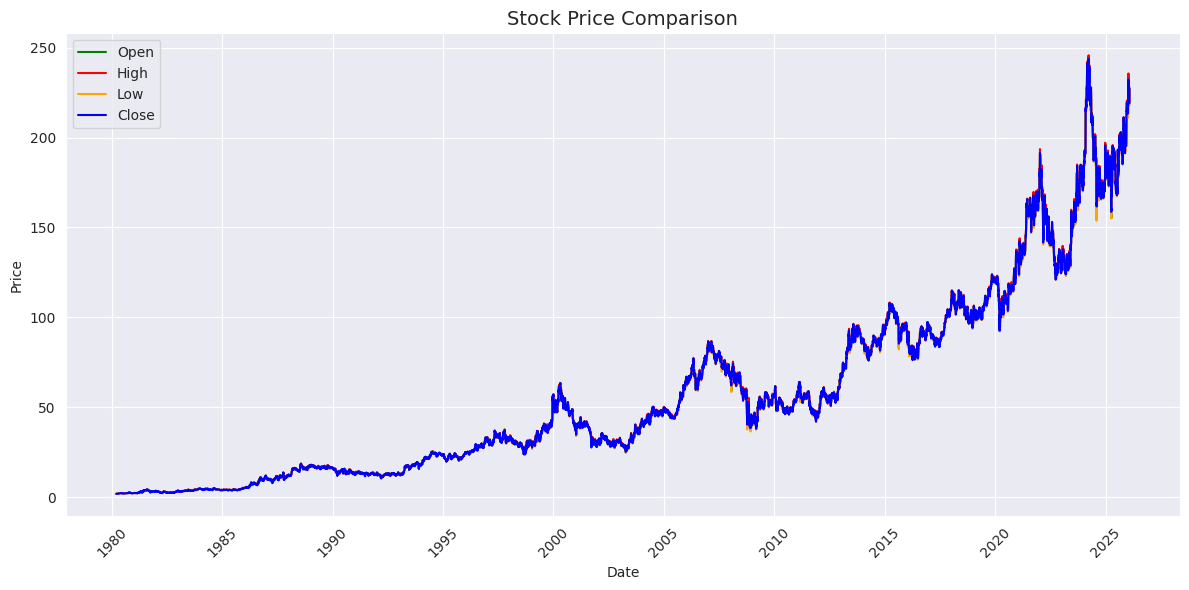

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Open'], color='green', label='Open')
plt.plot(df['Date'], df['High'], color='red', label='High')
plt.plot(df['Date'], df['Low'], color='orange', label='Low')
plt.plot(df['Date'], df['Close'], color='blue', label='Close')
plt.title("Stock Price Comparison", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


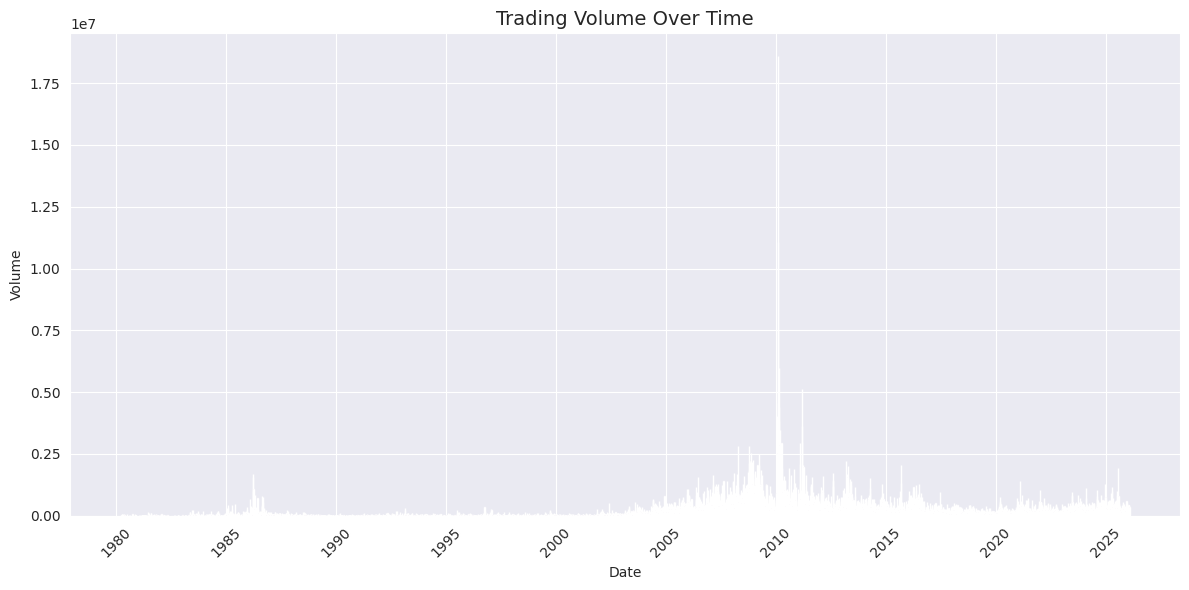

In [18]:
plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Volume'], color='purple')
plt.title("Trading Volume Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

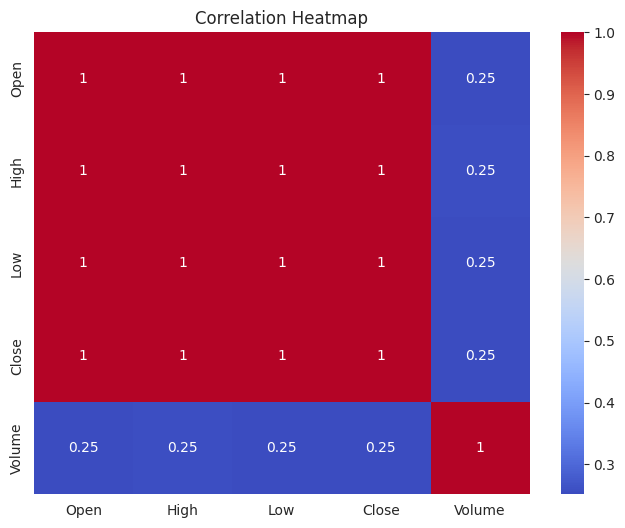

In [19]:
plt.figure(figsize=(8,6))
corr = df[['Open','High','Low','Close','Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

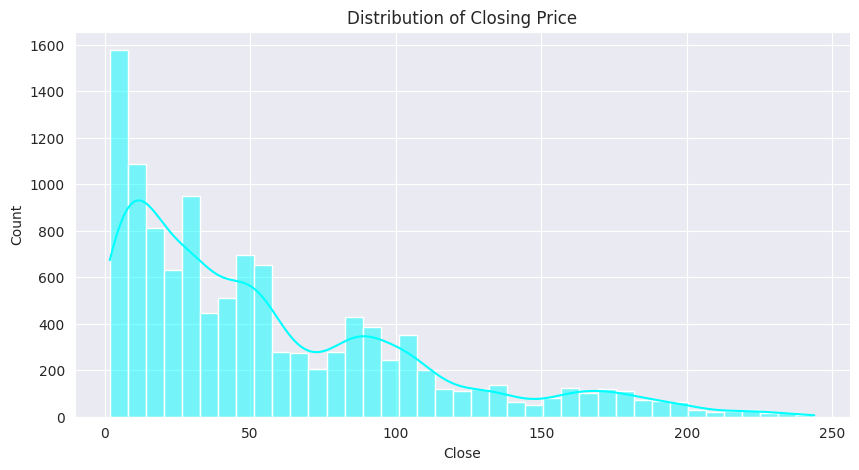

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], kde=True, color='cyan')
plt.title("Distribution of Closing Price")
plt.show()

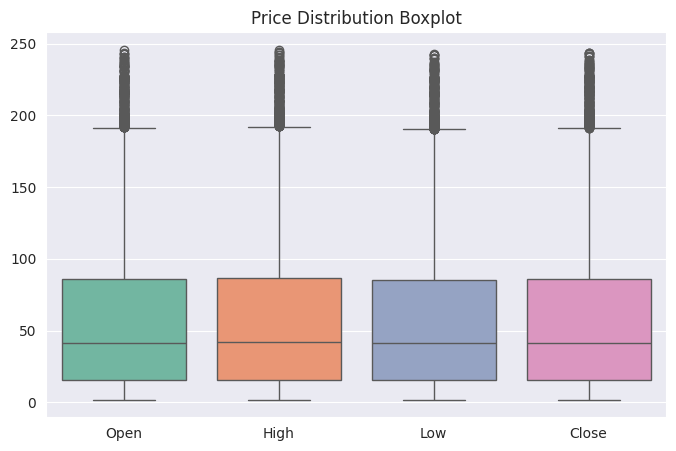

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Open','High','Low','Close']], palette='Set2')
plt.title("Price Distribution Boxplot")
plt.show()

## Feature engg

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values(by='Date')
df = df.drop_duplicates()


In [24]:
df[['Open','High','Low','Close','Volume']] = \
df[['Open','High','Low','Close','Volume']].ffill()

df.reset_index(drop=True, inplace=True)

In [25]:
df['Return'] = df['Close'].pct_change()

# Moving averages
df['MA_5'] = df['Close'].rolling(5).mean()
df['MA_10'] = df['Close'].rolling(10).mean()

# Target: Tomorrow price movement
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop NA created from rolling & shifting
df = df.dropna()

In [26]:
features = ['Open','High','Low','Close','Volume','Return','MA_5','MA_10']
X = df[features]
y = df['Target']

In [27]:
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 51.91%
Random Forest Accuracy: 49.17%
SVM Accuracy: 48.26%


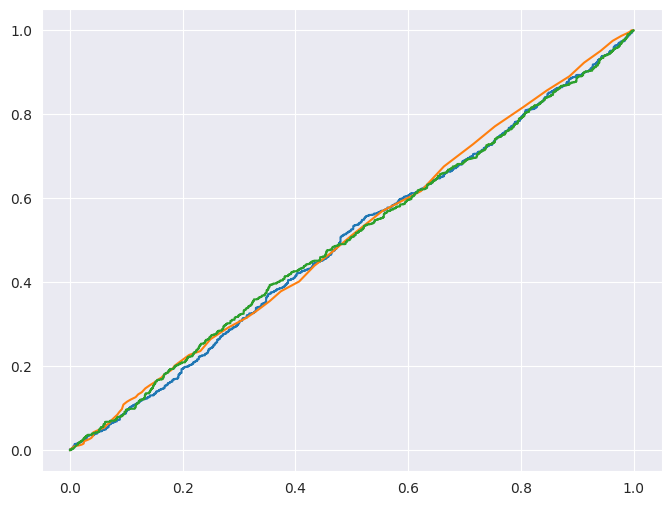

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")
    
    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


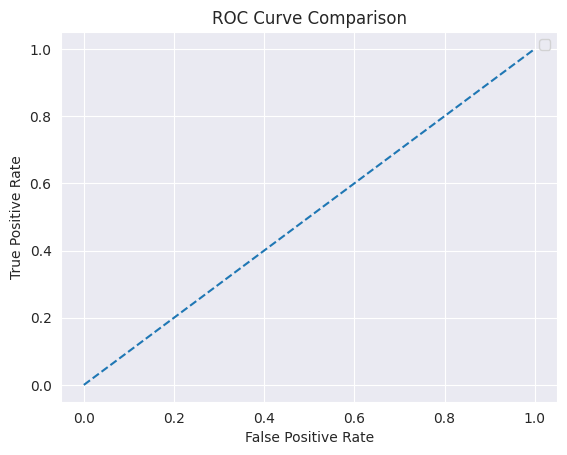

In [30]:
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [31]:
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix (Random Forest):")
print(cm)


Confusion Matrix (Random Forest):
[[ 988  118]
 [1058  136]]
